# Assignment 4

#####Consider the Bangalore House Price Data. Perform following  operations. 
#####a) Find and replace null values in the data using appropriate  technique. 
#####b) Transform the ‘Size’ column to numerical values. For Example:  2 BHK to be converted as 2 
#####c) Transform the ‘total_sqft’ column to contain numerical values  on same scale. If the range is given average value of the range to  be taken. 
#####d) Calculate and add one more column as ‘Price_Per_Sqft’ e) Remove the outliers from Price_Per_Sqft and BHK Size column  if any. 
#####f) Apply the Linear Regression model to the data and display the  training and testing performance measures as Mean Squared Error  and Accuracy 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Banglore Housing Prices.csv')
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


 Find and replace null values in the data using appropriate  technique. 


In [7]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.dropna()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


Transform the ‘Size’ column to numerical values. For Example:  2 BHK to be converted as 2

In [9]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['size'] = label_encoder.fit_transform(df['size'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,9,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,15,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,12,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,12,1521.0,3.0,95.00,6245.890861
4,Kothanur,9,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,17,3453.0,4.0,231.00,6689.834926
13316,Richards Town,14,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,9,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,14,4689.0,4.0,488.00,10407.336319


c) Transform the ‘total_sqft’ column to contain numerical values  on same scale. If the range is given average value of the range to  be taken. 


In [12]:
df.groupby('total_sqft').count()

,location,size,bath,price
total_sqft,,,,
1,1,1,1,1
1.25Acres,1,1,1,1
1.26Acres,1,1,1,1
1000,172,172,172,172
1000 - 1285,1,1,1,1
...,...,...,...,...
995,10,10,10,10
996,4,4,4,4
997,2,2,2,2


In [13]:
def convert_float(x):
  tokens = x.split('-')
  if(len(tokens) == 2):
    return float(tokens[0]) + float(tokens[1]) / 2
  try:
    return float(x)
  except:
    return None

In [14]:
df['total_sqft'] = df['total_sqft'].apply(convert_float)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,13,1056.0,2.0,39.07
1,Chikka Tirupathi,19,2600.0,5.0,120.00
2,Uttarahalli,16,1440.0,2.0,62.00
3,Lingadheeranahalli,16,1521.0,3.0,95.00
4,Kothanur,13,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,22,3453.0,4.0,231.00
13316,Richards Town,18,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,13,1141.0,2.0,60.00
13318,Padmanabhanagar,18,4689.0,4.0,488.00


In [15]:
df.isna().sum()

location       1
size           0
total_sqft    46
bath          73
price          0
dtype: int64

In [16]:
df.dropna(inplace = True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,13,1056.0,2.0,39.07
1,Chikka Tirupathi,19,2600.0,5.0,120.00
2,Uttarahalli,16,1440.0,2.0,62.00
3,Lingadheeranahalli,16,1521.0,3.0,95.00
4,Kothanur,13,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,22,3453.0,4.0,231.00
13316,Richards Town,18,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,13,1141.0,2.0,60.00
13318,Padmanabhanagar,18,4689.0,4.0,488.00


d) Calculate and add one more column as ‘Price_Per_Sqft’

In [17]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,13,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,19,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,16,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,16,1521.0,3.0,95.00,6245.890861
4,Kothanur,13,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,22,3453.0,4.0,231.00,6689.834926
13316,Richards Town,18,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,13,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,18,4689.0,4.0,488.00,10407.336319


e) Remove the outliers from Price_Per_Sqft and BHK Size column  if any. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


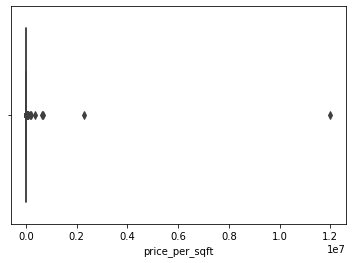

In [18]:
import seaborn as sns
sns.boxplot(df['price_per_sqft'])

In [19]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


In [20]:
df = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]
df

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,13,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,19,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,16,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,16,1521.0,3.0,95.00,6245.890861
4,Kothanur,13,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,22,3453.0,4.0,231.00,6689.834926
13316,Richards Town,18,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,13,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,18,4689.0,4.0,488.00,10407.336319


In [23]:

q1 = df['size'].quantile(0.25)
q3 = df['size'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [27]:
df = df[(df['size'] > lower_bound) & (df['size'] < upper_bound)]
df

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,9,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,15,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,12,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,12,1521.0,3.0,95.00,6245.890861
4,Kothanur,9,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13313,Uttarahalli,12,1345.0,2.0,57.00,4237.918216
13314,Green Glen Layout,12,1715.0,3.0,112.00,6530.612245
13316,Richards Town,14,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,9,1141.0,2.0,60.00,5258.545136


f) Apply the Linear Regression model to the data and display the  training and testing performance measures as Mean Squared Error  and Accuracy

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_linear = df[['price' , 'total_sqft']]
# print(df_linear)
X = df_linear.drop('price', axis = 'columns')
# print(X)
Y = df_linear['price']
# print(Y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [63]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [64]:
linear_regression.coef_

array([0.05304125])

In [65]:
linear_regression.intercept_

7.412516897321538

In [66]:
linear_regression.score(X_test, Y_test)

-0.2094387798619366

In [68]:
y_pred = linear_regression.predict(X_test)
print(mean_squared_error(Y_test, y_pred))

4966.529278221972


In [70]:
y_pred = linear_regression.predict(X_train)
print(mean_squared_error(Y_train, y_pred))

2258.3725608045793
